<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [36]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['y'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
def outlier_iqr(df, columns):
    lower_limit = {}
    upper_limit = {}
    for col in columns:
        q1 = np.quantile(df[col], q=.25)
        q3 = np.quantile(df[col], q=.75)
        iqr = q3 - q1
        lower_limit[col] = q1 - 1.5 * iqr
        upper_limit[col] = q3 + 1.5 * iqr
    for col in columns:
        df = df.loc[(df[col] >= lower_limit[col]) & (df[col] <= upper_limit[col])]
    return df

In [39]:
train_df, test_df = train_test_split(df, test_size=.2, random_state=1)

outlierless_df = outlier_iqr(train_df, list(set(train_df.columns) - set(["y"])))

X_train, y_train = outlierless_df.drop(['y'], axis=1), outlierless_df.y
X_test, y_test = test_df.drop(['y'], axis=1), test_df.y

print(X_train.shape, y_train.shape, )

(245, 13) (245,)


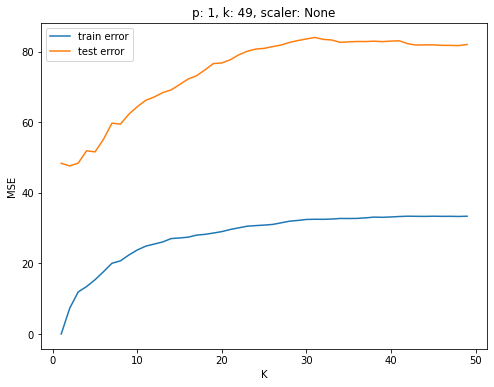

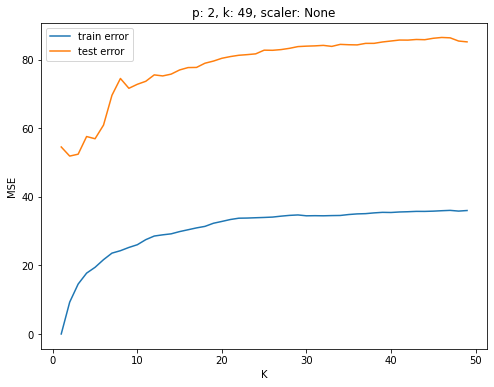

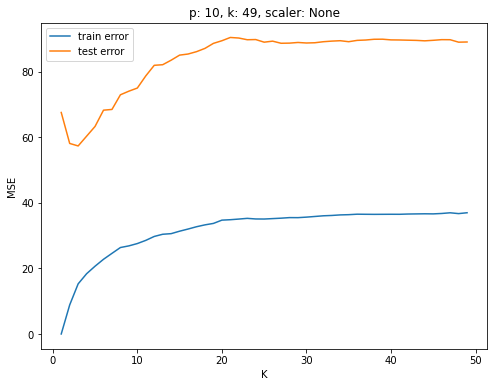

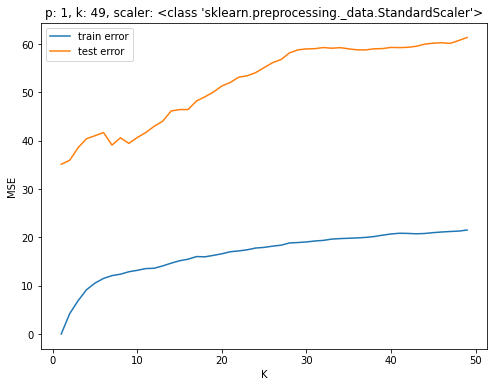

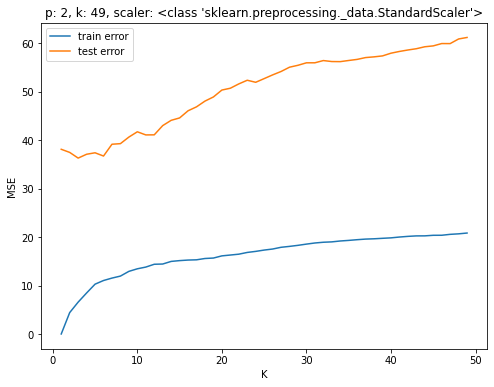

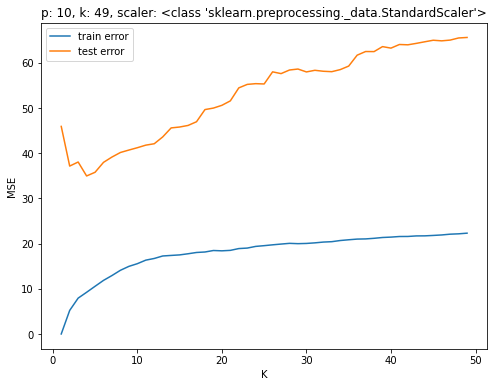

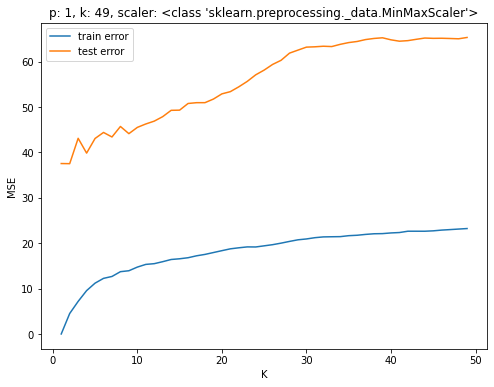

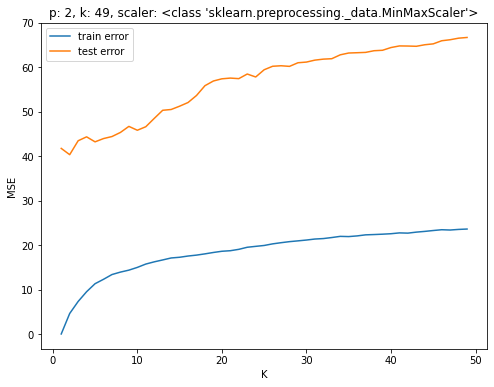

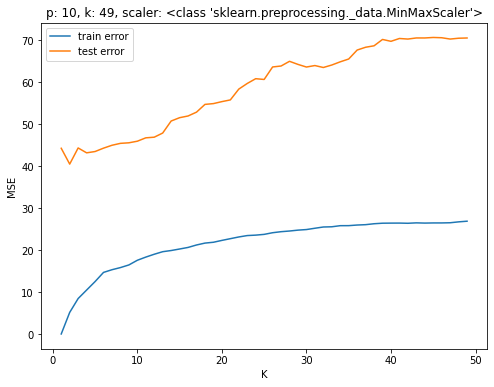

In [40]:
def plot_results(train_error, test_error):
    plt.figure(figsize=(8, 6))
    plt.title('K vs MSE')
    plt.xlabel('K')
    plt.ylabel('MSE')
    plt.plot(range(1,50), train_error, label='train error')
    plt.plot(range(1,50), test_error, label='test error')
    plt.legend()

results = {}

for scaler_cls in [None, StandardScaler, MinMaxScaler]:
    if scaler_cls is not None:
        scaler = scaler_cls()
        scaler.fit(X_train)
        X_train_norm = scaler.transform(X_train)
        X_test_norm = scaler.transform(X_test)
    else:
        X_train_norm = X_train
        X_test_norm = X_test
    for p in [1, 2, 10]:
        train_error = []
        test_error = []
        for k in range(1, 50):
            knn = KNeighborsRegressor(n_neighbors=k, p=p)
            knn.fit(X_train_norm, y_train)
            train_pred = knn.predict(X_train_norm)
            train_error.append(mean_squared_error(y_train, train_pred))
            test_pred = knn.predict(X_test_norm)
            test_error.append(mean_squared_error(y_test, test_pred))
        plot_results(train_error, test_error)
        plt.title("p: {}, k: {}, scaler: {}".format(p, k, scaler_cls))
        plt.show()
        results[(p, scaler_cls)] = min(test_error)